# 0) Resumo

1.  Importa dados

* data[ind][lei] =  dados originais em modificacao
* data2[ind][lei] = dados com filtro butterworth 20hz

2.  Segmenta dados
* data4[ind][lei][classe] = divisao com comprimento fixo 5 janelas base no trigger
* data5[ind][lei][classe] = divisao com comprimento fixo 5 janelas com ""centralizacao""
* x[id] = (0 a 3121) janelas capturadas
* z[id] = (0 a 13) classe atribuida a x[id]
* **y**[id] = (0 a 6) classes de movimentos.


# 1) Importar dados GITHUB

● Importa dados diretamente dos arquivos CSV originais (não tratados). (**github**)

In [12]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/pinojoke/Gestures_InertialSensors_EAAI/master/"
subjects = list(range(20))
mesurements = list(range(10))
data = []
for s in subjects:
  data.append([])
  for m in mesurements:
    filename = "subject"+str(s+1)+"_measurement"+str(m+1)+".csv"
    #print(filename)
    data[s].append(
        np.array(
            pd.read_csv(url+filename, header=None, encoding='utf8')))
print('Ok')

Ok


# 2) Segmentação e Visualização

● Salvar cada grupo de janela em um arquivo separado. (Classe 0 1 2 3 4 5 6)
• 

In [13]:
# Funcao captura de dados a partir do index da janela
def get_janela(index, janela=None, ind=None, lei=None):
  dados_janela = np.zeros((janela,10))
  for i in range(janela):
    dados_janela[i,:] = data[ind][lei][index+i,0:10]
  
  return dados_janela

#======================================================================
def get_5janelas(index, janela=None, ind=None, lei=None):
  dados_janela = np.zeros((janela*5,10))
  #dados_janela[i,:] = data[ind][lei][index+i,0:10]
  #dados_index_janela = np.zeros((janela,10))

  for i in range(janela*5):
    dados_janela[i,:] = data[ind][lei][index+i,0:10]
    #dados_janela = np.concatenate(( dados_index_janela, get_janela(i*passo+janela, janela, ind, lei) )) # Adiciona coluna tempo novamente

  sig=9
  tmp = dados_janela[90:110,sig]
  tmp2 = get_janela(index-10, janela, ind, lei)
  #print( np.mean(tmp2[:,9]), np.mean(tmp) )
  if (np.max(tmp)>300 or np.min(tmp)<250): 
    print('5Janela', ind, lei, index)
    if abs( np.mean(tmp2[:,9])-np.mean(tmp) )<25:
      dados_janela = get_5janelas(index-5, janela, ind, lei)
      
  return dados_janela

#======================================================================
# Funcao captura 5 janelas a partir do index
def get_5janela(index, janela=None, ind=None, lei=None):
  janela2 = janela*5
  dados_janela = np.zeros((janela2,10))
  for i in range(janela2):
    dados_janela[i,:] = data[ind][lei][index+i,0:10]
    
  # Confere se final da janela sobrepos
  #tmp = data[ind][lei][i*passo:i*passo+janela,sig]
  #tmp = dados_janela[100:110,sig]
  #if np.max(tmp)>300 or np.min(tmp)<250:
  #  print('a')
  #  dados_janela = get_5janela(index-10, janela, ind, lei)
  #else:
  return dados_janela

#======================================================================
''' 

indd = 2
leii = 0
indx = 1760

teste = get_5janelas(indx, 22, indd, leii) # 5 janelas com recursiva
teste2 = get_5janela(indx, 22, indd, leii) # 5 janelas
#dados_janela = np.zeros((janela,10))
#print( dados_janela) #, teste.shape,  )
print( teste.shape, teste2.shape )
plt.rcParams["figure.figsize"] = (10,5)    # largura / altura
plt.plot(teste)
plt.show()
plt.plot( teste2 )
#print( teste[100:110,:])
#''';

#Fim
print( 'Ok' )

Ok


# 2.1) Segmenta TODOS para data*X* [ind] [lei] [classes]

In [14]:
# Extrai cada classe para data4[ind][lei][classe]
# data5 = classes ajustadas centralizadas

contador2 = 0
sig = 9
data4 = []
data5 = [] # Contem dados SEGMENTADOS em 5 JANELAS RECURSIVA

# Confere todos INDIVIDUOS
for ind1 in range(0, 20):
  data4.append([]) #data4[0]
  data5.append([])

  for lei1 in range(0, 10):                             # Confere todas LEITURAS
    data4[ind1].append([]) #data[0][0]
    data5[ind1].append([])
    
    passo = 22
    total_leitura = data[ind1][lei1].shape[0]
    
    classe = 0
    ultimaclasse = 50
    conta5janela = 0
    
    data4[ind1][lei1].append([]) #data[0][0][0]
    data4[ind1][lei1][classe] = np.array([], dtype=np.int64).reshape(0,10)
    data5[ind1][lei1].append([])
    data5[ind1][lei1][classe] = np.array([], dtype=np.int64).reshape(0,10)
    
    # LOOP para cada amostra (cada linha coletada)
    for i in range( total_leitura//passo ):
      
      tmp = data[ind1][lei1][i*passo:i*passo+passo,sig]
      
      if classe == 12:
        #print(i,'Oi')
        break
        print('aaaaaaaaaa')
      
      if (np.max(tmp)>300 or np.min(tmp)<250):# or (conta5janela != 5 and conta5janela !=0):
        if not inclass:
          classe += 1
          data4[ind1][lei1].append([])
          data5[ind1][lei1].append([])
          # Captura janela anterior ao inicio do trigger
          #data4[ind1][lei1][classe] = get_janela( (i-1)*passo+passo, passo, ind1, lei1 )
          data4[ind1][lei1][classe] = get_5janela( (i-1)*passo+passo, passo, ind1, lei1 )
          data5[ind1][lei1][classe] = get_5janelas( (i-1)*passo+passo, passo, ind1, lei1 )
          conta5janela += 1
            
        # Captura janela da classe
        #data4[ind1][lei1][classe] = np.concatenate(( data4[ind1][lei1][classe], get_janela( i*passo, passo, ind1, lei1) ))
        
        #for conta5janela != 5 or conta5janela !=0)
        
        
        ultimaclasse = classe
        conta5janela +=1
        
        inclass = True
      else:
        inclass = False
        #print( classe, ultimaclasse, len( data4[ind1][lei1] ) )
        
        conta5janela = 0
        if ultimaclasse == classe:
          classe += 1
          data4[ind1][lei1].append([])
          data5[ind1][lei1].append([])
        
          data4[ind1][lei1][classe] = get_janela( i*passo+passo, passo, ind1, lei1 )
          data5[ind1][lei1][classe] = get_janela( i*passo+passo, passo, ind1, lei1 )
          
        data4[ind1][lei1][classe] = np.concatenate(( data4[ind1][lei1][classe], get_janela( i*passo, passo, ind1, lei1) ))
        data5[ind1][lei1][classe] = np.concatenate(( data5[ind1][lei1][classe], get_janela( i*passo, passo, ind1, lei1) ))
        #ultimaclasse = classe
        
        
      #fim for amostra
    #fim for leitura
    if (len(data4[ind1][lei1]) != 13):
      print( 'Ind:', ind1, 'Lei:', lei1 , 'Classes:', len(data4[ind1][lei1]))
  #fim for individuo
  



'''
for grap in range(0,2,2):                        # 0a20, de 2 em 2
  plt.clf()

'''
ind1 = 5
lei1 = 1
print( len( data4[ind1][lei1] ), contador2, end=' ' )
#print( data4[ind1][lei1][0].shape, data4[ind1][lei1][1].shape), data4[ind1][lei1][2].shape );
#for i in range(14):
#  print(i, data4[1][6][i].shape)
print( ' End' )


5Janela 0 2 594
5Janela 0 2 589
5Janela 1 0 242
5Janela 1 0 237
5Janela 1 0 440
5Janela 1 0 435
5Janela 1 0 430
5Janela 1 0 425
5Janela 1 1 440
5Janela 1 2 242
5Janela 1 2 440
5Janela 1 2 638
5Janela 1 5 484
5Janela 1 5 479
5Janela 1 7 308
5Janela 1 7 303
5Janela 1 7 506
5Janela 1 7 501
5Janela 1 7 496
5Janela 1 7 594
5Janela 1 9 374
5Janela 4 1 1144
5Janela 4 1 1139
5Janela 4 1 1134
5Janela 4 1 1129
5Janela 4 1 1124
5Janela 4 1 1119
5Janela 4 1 1114
5Janela 8 2 1364
5Janela 8 2 1359
5Janela 8 2 1354
5Janela 8 7 1562
5Janela 8 7 1557
5Janela 8 7 1552
5Janela 8 7 1547
5Janela 8 7 1542
5Janela 11 3 1474
5Janela 11 3 1469
5Janela 11 3 1464
5Janela 11 3 1459
5Janela 11 3 1454
5Janela 11 3 1449
5Janela 11 3 1444
5Janela 11 5 1408
5Janela 11 5 1403
5Janela 11 5 1398
5Janela 11 5 1393
5Janela 12 4 1694
5Janela 12 4 1689
5Janela 12 4 1684
5Janela 12 4 1679
5Janela 12 4 1674
5Janela 12 4 1669
5Janela 13 0 1320
5Janela 13 0 1315
5Janela 13 0 1310
5Janela 13 0 1305
5Janela 13 0 1300
5Janela 13 0 

# 2.2) Salva cada CLASSE em arquivo


In [15]:
# Salva data5 em arquivos.

import os
import math
import matplotlib
import matplotlib.pyplot as plt

dir_files = 'a'
dir_files2 = 'b'
a=0
b=0
x = []
#x.append([])
y = []
#y.append([])
#os.makedirs(dir_files, exist_ok=True) #os.mkdir('a')
os.makedirs(dir_files2, exist_ok=True) #os.mkdir('b')

# SALVA todos dados da variavel DATA4
for ind1 in range(0,20):
  for lei1 in range(10):
    #for clas1 in range( len(data4[ind1][lei1]) ):
    #  np.savetxt(str(dir_files)+'/s'+str(ind1)+'m'+str(lei1)+'c'+str(clas1)+'.txt', data4[ind1][lei1][clas1], delimiter=',',fmt='%10.2f')
      #print( 'c'+str(a1), '> ', data4[ind1][lei1][a1].shape[0], 'x', data4[ind1][lei1][a1].shape[1] )
      #np.savetxt(str(dir_files)+'/s'+str(ind1).zfill(2)+'m'+str(lei1).zfill(2)+'c'+str(clas1).zfill(2)+'.txt', data4[ind1][lei1][clas1], delimiter=',',fmt='%10.2f')
      #os.remove('s'+str(ind1)+'m'+str(lei1)+'c'+str(a1)+'.txt')
    #print(range( len(data5[ind1][lei1] ) ) )
    for clas1 in range( len(data5[ind1][lei1]) ):
      
      tmp = data5[ind1][lei1][clas1].shape[0]
      if tmp > 111:
        tmp2 = tmp/110
        for i in range( math.floor(tmp2) ):
          #b += 1
          x.append([])
          x[b] = data5[ind1][lei1][clas1][i*110:(i+1)*110,:]
          y.append([])
          y[b] = 0
          
          b += 1
          #np.savetxt(str(dir_files2)+'/s'+str(ind1)+'m'+str(lei1)+'c'+str(clas1)+'_'+str(i)+'.txt', data5[ind1][lei1][clas1][i*110:(i+1)*110,:], delimiter=',',fmt='%10.2f')
      elif tmp == 110:
        #b += 1
        x.append([])
        x[b] = data5[ind1][lei1][clas1]    #[i*110:(i+1)*110,:]
        y.append([])
        if clas1 % 2 == 0: #Par
          y[b] = 0
        else:              #Impar
          #y[b] = clas1
          if clas1 <= 1:
            y[b] = clas1
          elif clas1 == 3:
            y[b] = 2
          elif clas1 == 5:
            y[b] = 3
          elif clas1 == 7:
            y[b] = 4
          elif clas1 == 9:
            y[b] = 5
          elif clas1 == 11:
            y[b] = 6
          elif clas1 == 13:
            y[b] = 7
            print('-------------------------------------------------')
          
            #print(b)
            
        b += 1
        #np.savetxt(str(dir_files2)+'/s'+str(ind1)+'m'+str(lei1)+'c'+str(clas1)+'.txt', data5[ind1][lei1][clas1], delimiter=',',fmt='%10.2f')
      #elif tmp == 88:
      #  esticar
      else:
        #print('Ignorados:', ind1, lei1, clas1, 'Shape:', tmp)
        a += 1
    #Para cada leitura
    #print ( 'Ind: '+str(ind1)+' Lei: '+str(lei1)+'> ', b1 ,'-', data[ind1][lei1].shape[0], '=', b1-data[ind1][lei1].shape[0] )
      
        
  #Para cada Individuo
  #print ( 'Ind: '+str(ind1)+'> ', b1 ,'-', data[ind1][lei1].shape[0], '=', b1-data[ind1][lei1].shape[0] )

print( len(x) );
  
deee = 1
#===============================================================================
if deee == 0:

  plt.rcParams["figure.figsize"] = (15,5)   # largura / altura
  for aa in range(6):
    plt.subplot(2,6,aa+1)
    plt.plot( data4[4][1][aa+1] );
    plt.ylim([-50,700])  
  #plt.subplot(221)
  #plt.plot( data4[0][0][0] );


2695


In [16]:
# Plot Histograma teste
#''';
import matplotlib.pyplot as plt
#x=[]
#x.append([])
#x[1] = 1
#num = 0
#y=[]
#print(x[num], y[num], len(x), '\n', x[3120] )
#print( min(y), max(y), y[0] )
#print( min(y) )
#print(x[3120])
a0 = 0
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
#yct=[]
for i in range(0, len(x) ):
  if y[i] == 0:
    a0 += 1
  if y[i] == 1:
    a1 += 1
  if y[i] == 2:
    a2 += 1
  if y[i] == 3:
    a3 += 1
  if y[i] == 4:
    a4 += 1
  if y[i] == 5:
    a5 += 1
  if y[i] == 6:
    a6 += 1
  if y[i] == 7:
    a7 += 1
  
  #for ii in range(0,7):
  #  if y[i] == ii:
  #    yct.append([])
  #    yct[ii] += 1

print( a0, a1, a2, a3, a4, a5, a6, a7)
print( y[0:20] )
#print( )
  
#plt.hist(y, bins=14)
#''';

1495 200 200 200 200 200 200 0
[0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 5, 0, 6, 0, 0, 0, 1, 0, 2, 0]


# 3) Classificadores

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Classe verdadeira',
           xlabel='Classe estimada')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    ax.grid(None)
    fig.set_size_inches(10,10)
    return ax


# 3.1) KNN

In [0]:

import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.neighbors import KNeighborsClassifier


In [20]:
# Converte LIST em ARRAY

xa = np.asarray(x)
ya = np.asarray(y)

p_samples = len(xa)
p_data = xa.reshape((p_samples, -1))

print( p_samples, xa.shape, p_data.shape, ya.shape)

2695 (2695, 110, 10) (2695, 1100) (2695,)


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_neighbors': [1,2,3,4,5], 'weights': ['uniform','distance']}]

classifierKNN = KNeighborsClassifier()

grid_search = GridSearchCV(classifierKNN, param_grid)

grid_search.fit(p_data[:p_samples // 10*7], ya[:p_samples // 10*7])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [0]:
expected = ya[p_samples // 10*3:]

predicted = grid_search.predict(p_data[p_samples // 10*3:])

In [24]:
grid_search.score(p_data[p_samples // 10*3:], expected)

0.9242584745762712

In [25]:
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)
print( 'F1_score:',  metrics.f1_score(expected, predicted, average=None) )
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Confusion matrix:
[[1072    0    0    0    0    0    0]
 [  13  121    0    0    2    0    0]
 [   3   22  103    6    2    0    0]
 [  27    1    0  108    0    0    0]
 [   8    0    0   29   99    0    0]
 [   2    5    0    0    0  127    2]
 [   1    0    4    0    1   15  115]]
F1_score: [0.97543221 0.84912281 0.84773663 0.77419355 0.825      0.91366906
 0.90909091]


Confusion matrix, without normalization
Normalized confusion matrix


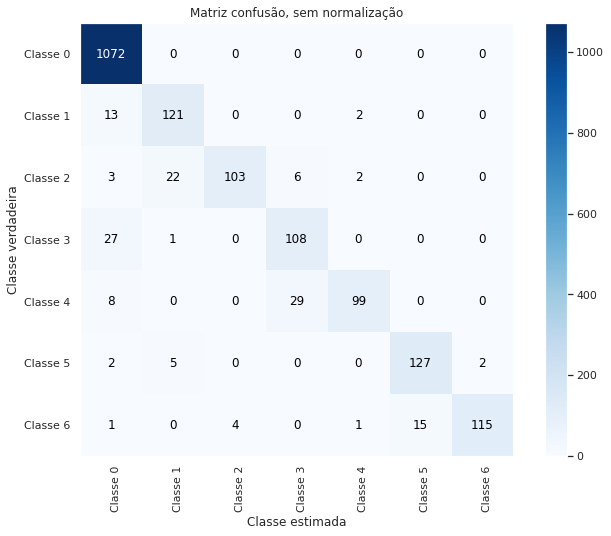

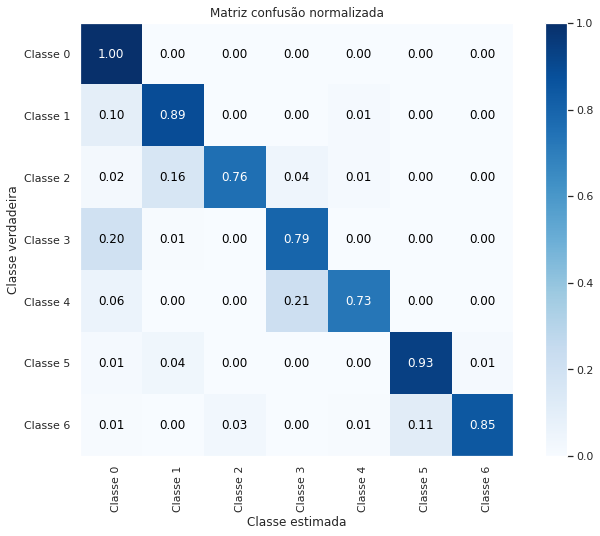

In [26]:

class_names = np.array([ 'Classe 0', 'Classe 1', 'Classe 2', 'Classe 3',
                        'Classe 4',  'Classe 5', 'Classe 6', 'Classe 7'])
y_test = expected
y_pred = predicted

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Matriz confusão, sem normalização')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Matriz confusão normalizada')


plt.show()

# Metricas
print()

# 3.2) SVM

In [0]:

import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.svm import SVC

In [28]:
# Converte LIST em ARRAY

xa = np.asarray(x)
ya = np.asarray(y)

p_samples = len(xa)
p_data = xa.reshape((p_samples, -1))

print( p_samples, xa.shape, p_data.shape, ya.shape)

2695 (2695, 110, 10) (2695, 1100) (2695,)


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'kernel': ['linear', 'rbf'], 'C': [0.1,1,10], 'gamma': ['auto', 'scale']}]

classifierSVC = SVC()

grid_search = GridSearchCV(classifierSVC, param_grid)

grid_search.fit(p_data[:p_samples // 10*7], ya[:p_samples // 10*7])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10], 'gamma': ['auto', 'scale'],
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [0]:
expected = ya[p_samples // 10*3:]

predicted = grid_search.predict(p_data[p_samples // 10*3:])

In [32]:
grid_search.score(p_data[p_samples // 10*3:], expected)

0.965042372881356

In [33]:
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)
print( 'F1_score:',  metrics.f1_score(expected, predicted, average=None) )
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Confusion matrix:
[[1071    0    0    1    0    0    0]
 [   2  132    0    1    1    0    0]
 [   0   12  117    0    7    0    0]
 [  10    0    0  125    1    0    0]
 [   0    0    1   15  120    0    0]
 [   0    2    0    0    0  131    3]
 [   0    0    0    0    0   10  126]]
F1_score: [0.99 0.94 0.92 0.9  0.91 0.95 0.95]


Confusion matrix, without normalization
Normalized confusion matrix


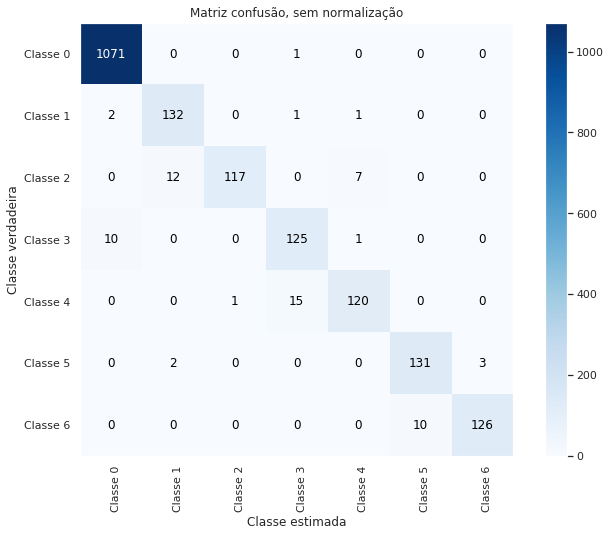

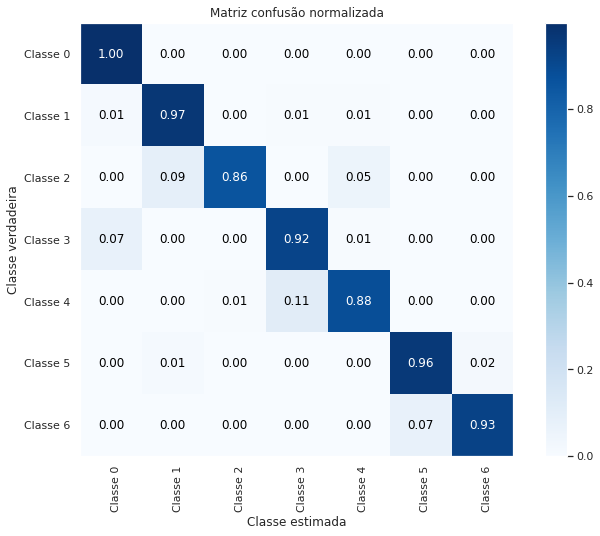

In [34]:

class_names = np.array([ 'Classe 0', 'Classe 1', 'Classe 2', 'Classe 3',
                        'Classe 4',  'Classe 5', 'Classe 6', 'Classe 7'])
y_test = expected
y_pred = predicted

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Matriz confusão, sem normalização')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Matriz confusão normalizada')


plt.show()

# Metricas
print()

# 3.3) Gradient Boosting

In [0]:

import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
# Converte LIST em ARRAY

xa = np.asarray(x)
ya = np.asarray(y)

p_samples = len(xa)
p_data = xa.reshape((p_samples, -1))

print( p_samples, xa.shape, p_data.shape, ya.shape)

2695 (2695, 110, 10) (2695, 1100) (2695,)


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [50,100, 150], 'learning_rate': [0.05,0.1,0.5]}]

classifierGBC = GradientBoostingClassifier()

grid_search = GridSearchCV(classifierGBC, param_grid)

grid_search.fit(p_data[:p_samples // 10*7], ya[:p_samples // 10*7])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [38]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [0]:
expected = ya[p_samples // 10*3:]

predicted = grid_search.predict(p_data[p_samples // 10*3:])

In [40]:
grid_search.score(p_data[p_samples // 10*3:], expected)

0.9629237288135594

In [41]:
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)
print( 'F1_score:',  metrics.f1_score(expected, predicted, average=None) )
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Confusion matrix:
[[1072    0    0    0    0    0    0]
 [   1  134    0    1    0    0    0]
 [   0   15  119    1    1    0    0]
 [   4    0    2  129    1    0    0]
 [   0    0    0   13  123    0    0]
 [   0    0    0    4    0  128    4]
 [   0    0    2    0    2   19  113]]
F1_score: [1.   0.94 0.92 0.91 0.94 0.9  0.89]


Confusion matrix, without normalization
Normalized confusion matrix


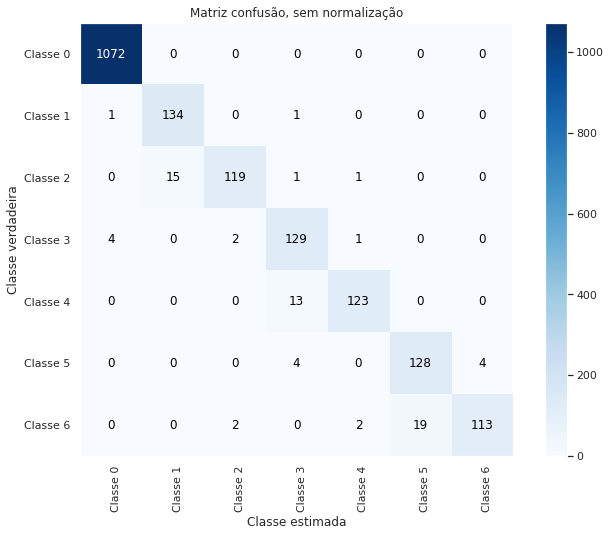

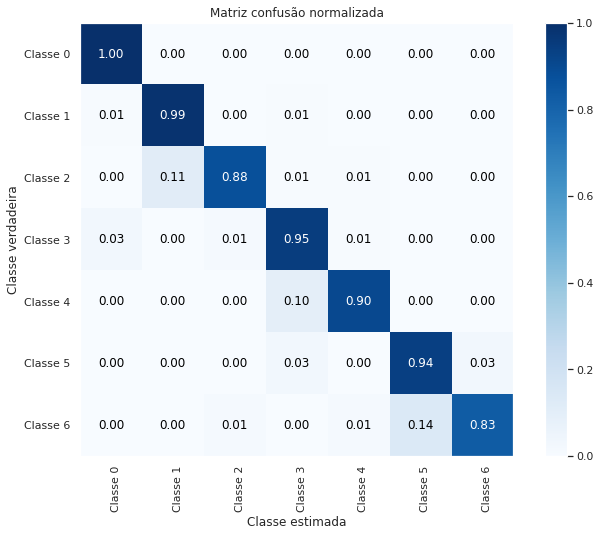

In [42]:

class_names = np.array([ 'Classe 0', 'Classe 1', 'Classe 2', 'Classe 3',
                        'Classe 4',  'Classe 5', 'Classe 6', 'Classe 7'])
y_test = expected
y_pred = predicted

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Matriz confusão, sem normalização')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Matriz confusão normalizada')


plt.show()

# Metricas
print()

# 3.4) Gaussian Naive Bayes

In [0]:

import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.naive_bayes import GaussianNB

In [44]:
# Converte LIST em ARRAY

xa = np.asarray(x)
ya = np.asarray(y)

p_samples = len(xa)
p_data = xa.reshape((p_samples, -1))

print( p_samples, xa.shape, p_data.shape, ya.shape)

2695 (2695, 110, 10) (2695, 1100) (2695,)


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = []

classifierGNB = GaussianNB()

grid_search = classifierGNB

grid_search.fit(p_data[:p_samples // 10*7], ya[:p_samples // 10*7])

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
expected = ya[p_samples // 10*3:]

predicted = grid_search.predict(p_data[p_samples // 10*3:])

In [49]:
grid_search.score(p_data[p_samples // 10*3:], expected)

0.8564618644067796

In [50]:
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)
print( 'F1_score:',  metrics.f1_score(expected, predicted, average=None) )
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Confusion matrix:
[[1006    1    5   38    4   15    3]
 [   0  110    3    6    6    8    3]
 [   0   22   87    1   19    4    3]
 [   0    2    3  109   17    4    1]
 [   0    7   15   18   87    5    4]
 [   0    6    0    0    1  115   14]
 [   0    0    3    0    0   30  103]]
F1_score: [0.97 0.77 0.69 0.71 0.64 0.73 0.77]


Confusion matrix, without normalization
Normalized confusion matrix


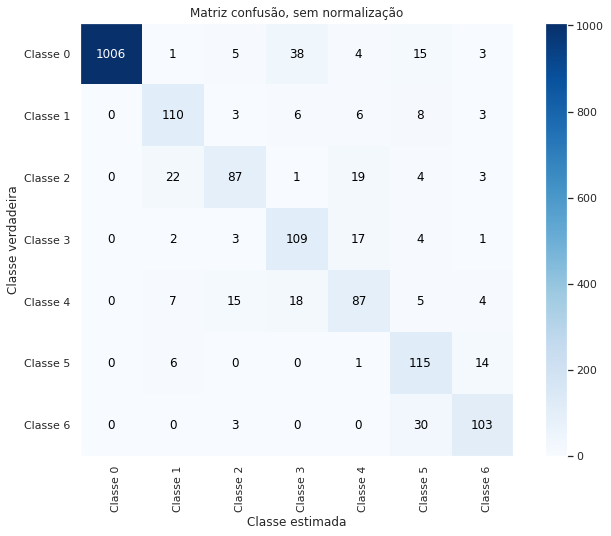

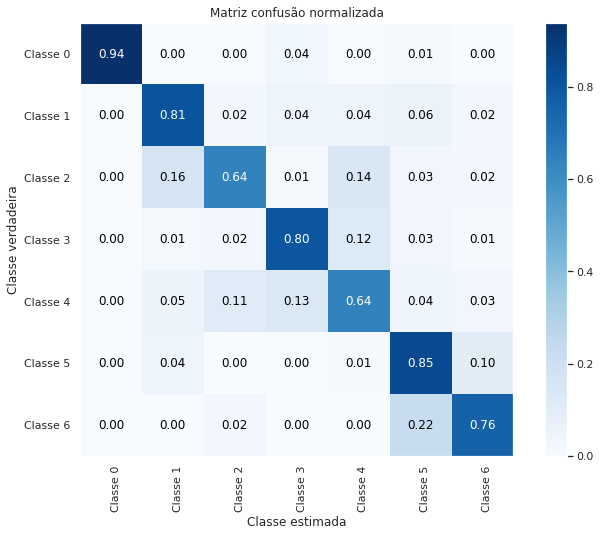

In [51]:

class_names = np.array([ 'Classe 0', 'Classe 1', 'Classe 2', 'Classe 3',
                        'Classe 4',  'Classe 5', 'Classe 6', 'Classe 7'])
y_test = expected
y_pred = predicted

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Matriz confusão, sem normalização')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Matriz confusão normalizada')


plt.show()

# Metricas
print()

# 3.5) Logistic Regression

In [0]:

import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression

In [53]:
# Converte LIST em ARRAY

xa = np.asarray(x)
ya = np.asarray(y)

p_samples = len(xa)
p_data = xa.reshape((p_samples, -1))

print( p_samples, xa.shape, p_data.shape, ya.shape)

2695 (2695, 110, 10) (2695, 1100) (2695,)


In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}]

classifierLR = LogisticRegression()

grid_search = GridSearchCV(classifierLR, param_grid)

grid_search.fit(p_data[:p_samples // 10*7], ya[:p_samples // 10*7])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/s

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': array([1.00e-04, 2.64e-04, 6.95e-04, 1.83e-03, 4.83e-03, 1.27e-02,
       3.36e-02, 8.86e-02, 2.34e-01, 6.16e-01, 1.62e+00, 4.28e+00,
       1.13e+01, 2.98e+01, 7.85e+01, 2.07e+02, 5.46e+02, 1.44e+03,
       3.79e+03, 1.00e+04]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],

In [55]:
grid_search.best_params_

{'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}

In [0]:
expected = ya[p_samples // 10*3:]

predicted = grid_search.predict(p_data[p_samples // 10*3:])

In [57]:
grid_search.score(p_data[p_samples // 10*3:], expected)

0.948093220338983

In [58]:
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)
print( 'F1_score:',  metrics.f1_score(expected, predicted, average=None) )
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Confusion matrix:
[[1072    0    0    0    0    0    0]
 [   3  131    0    0    1    1    0]
 [   0   16  114    0    5    1    0]
 [  15    0    0  118    3    0    0]
 [   7    0    1   21  107    0    0]
 [   2    1    0    0    0  129    4]
 [   0    0    0    0    1   16  119]]
F1_score: [0.99 0.92 0.91 0.86 0.85 0.91 0.92]


Confusion matrix, without normalization
Normalized confusion matrix


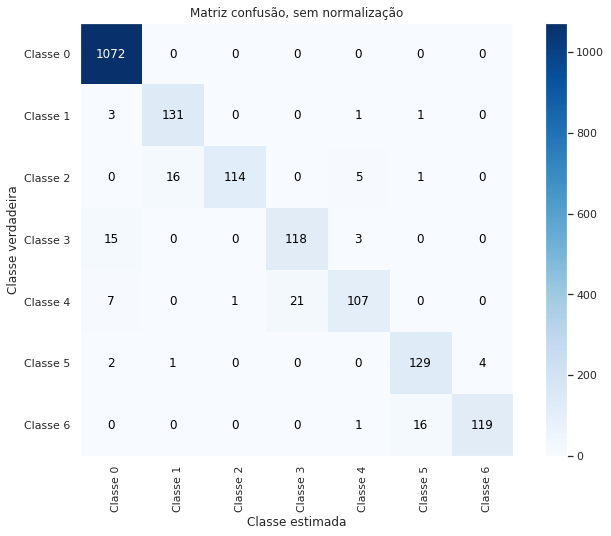

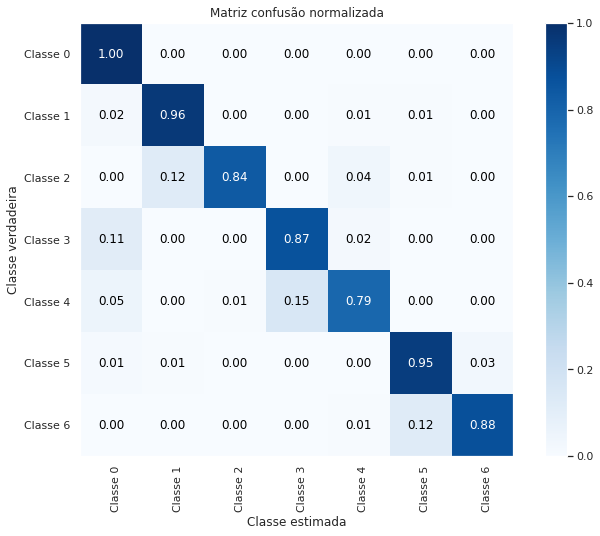

In [59]:

class_names = np.array([ 'Classe 0', 'Classe 1', 'Classe 2', 'Classe 3',
                        'Classe 4',  'Classe 5', 'Classe 6', 'Classe 7'])
y_test = expected
y_pred = predicted

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Matriz confusão, sem normalização')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Matriz confusão normalizada')


plt.show()

# Metricas
print()

# 3.6) AdaBoost

In [0]:

import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.ensemble import AdaBoostClassifier

In [61]:
# Converte LIST em ARRAY

xa = np.asarray(x)
ya = np.asarray(y)

p_samples = len(xa)
p_data = xa.reshape((p_samples, -1))

print( p_samples, xa.shape, p_data.shape, ya.shape)

2695 (2695, 110, 10) (2695, 1100) (2695,)


In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [50,100, 150], 'learning_rate': [0.05,0.1,0.5]}]

classifierAB = AdaBoostClassifier()

grid_search = GridSearchCV(classifierAB, param_grid)

grid_search.fit(p_data[:p_samples // 10*7], ya[:p_samples // 10*7])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid=[{'learning_rate': [0.05, 0.1, 0.5],
                          'n_estimators': [50, 100, 150]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
grid_search.best_params_

{'learning_rate': 0.5, 'n_estimators': 150}

In [0]:
expected = ya[p_samples // 10*3:]

predicted = grid_search.predict(p_data[p_samples // 10*3:])

In [66]:
grid_search.score(p_data[p_samples // 10*3:], expected)

0.871822033898305

In [67]:
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)
print( 'F1_score:',  metrics.f1_score(expected, predicted, average=None) )
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Confusion matrix:
[[1064    1    0    6    1    0    0]
 [   1  127    1    7    0    0    0]
 [   0   18   88   11   19    0    0]
 [   0    1    0  128    7    0    0]
 [   0    1    5   43   87    0    0]
 [   0    7    3    9   10  105    2]
 [   0    1   29    0   22   37   47]]
F1_score: [1.   0.87 0.67 0.75 0.62 0.76 0.51]


Confusion matrix, without normalization
Normalized confusion matrix


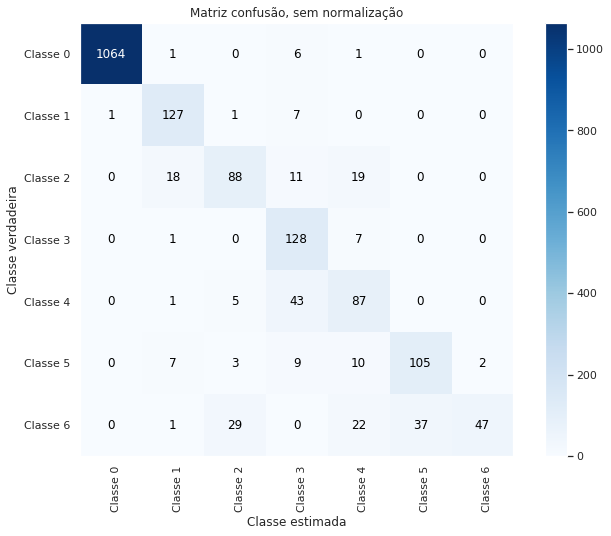

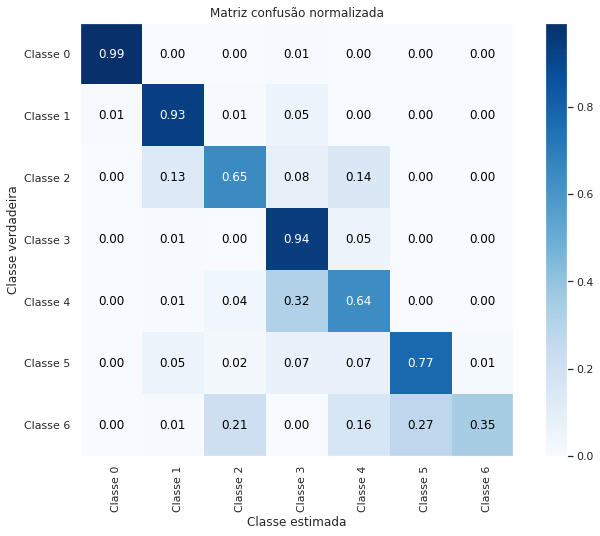

In [68]:

class_names = np.array([ 'Classe 0', 'Classe 1', 'Classe 2', 'Classe 3',
                        'Classe 4',  'Classe 5', 'Classe 6', 'Classe 7'])
y_test = expected
y_pred = predicted

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Matriz confusão, sem normalização')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Matriz confusão normalizada')


plt.show()

# Metricas
print()